
## Objectifs
##### 1 Lire et traiter des données d'entrée avec [PANDAS](https://pandas.pydata.org/)

##### 2 Représenter la distribution empirique des "fold-change" (**FC**) vs Précision, aka: volcano-plot
    
##### 3 Effectuer une analyse de sur-représentation en termes GO


## Ressources
https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html

https://matplotlib.org/gallery.html#


### Déclarations d'environnement
A verifier/ adapter

In [11]:
import sys, os
workDir = f"{os.getcwd()}/.."
libDir = f"{workDir}/lib"
dataDir= f"{workDir}/data" 

sys.path.append(libDir)

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import uniprot, go
import numpy as np

In [19]:
%matplotlib nbagg
import matplotlib.pyplot as plt

## Jeux de données
* Jeux de données de protéomique quantitative au format TSV
* Ontologie GO au format [owl](http://www.obofoundry.org/ontology/go.html)
* Entrées Uniprot au format XML
    * Protéines de l'étude
    * Protéome d'E.Coli complet
    
<hr style="border:1px solid gray"> </hr>

### Lecture des valeurs experimentales
Charger ```TCL_wt1.tsv``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ 
Retirer les lignes présentant des aberrations numériques
</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Attention aux types des colonnes !</span>

In [21]:
df = pd.read_csv("../TCL_wt1.tsv",sep="\t",
                 dtype={"Accession":str,
                        "Description":str,
                        "Gene symbol":str,
                        "Corrected Abundance ratio (1.53)":np.float64,
                        "Log2 Corrected Abundance Ratio": np.float64,
                        "Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)":np.float64,
                        "LOG10 Adj.P-val":np.float64}, 
                 na_values='#VALEUR!')

In [22]:
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,0.000027,4.571899
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,NaN,NaN,NaN,NaN
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,0.019963,1.699768


##### 1. Un premier volcano-plot

Ce type de figure représente pour chaque protéine en abscisse le taux d'abondance et en ordonnée la précision de la mesure.

<span style="color:firebrick;font-weight:bold">$\rhd$ 1. Réaliser un scatter plot matplotlib avec</span>
<br/><span style="color:firebrick;font-weight:bold">- en x, `Log2 Corrected Abundance Ratio`</span>
<br/><span style="color:firebrick;font-weight:bold">-  en y, `LOG10 Adj.P-val`</span>

<span style="color:firebrick;font-weight:bold">$\rhd$Vous légenderez les axes, attention `LOG10 Adj.P-val` est en fait `-LOG10 Adj.P-val`, regardez bien.</span>

<IPython.core.display.Javascript object>


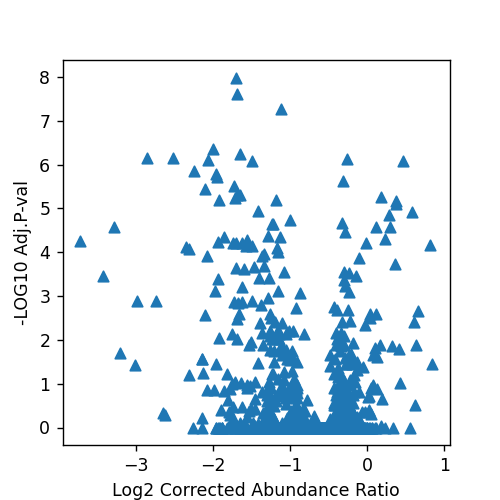

Text(0, 0.5, '-LOG10 Adj.P-val')

In [26]:
log2car = df['Log2 Corrected Abundance Ratio'].tolist()
log10apval = df['LOG10 Adj.P-val'].tolist()


fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(log2car, log10apval, marker = "^")
ax1.set_xlabel("Log2 Corrected Abundance Ratio")
ax1.set_ylabel("-LOG10 Adj.P-val")

##### 2. Réaliser des versions évoluées du graphique précédent
L'objectif est de mettre l'accent sur la région **-Log10 adj Pvalue > 4** et **Log2 corrected abundance ratio > 0**.
<br/>Pour cela vous revisiterez le scatter plot précedent au travers des versions suivantes:
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ première version : un rectangle de la couleur de votre choix matérialisera la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ deuxième version  : une couleur de votre choix représentera les points de la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ troisème version (optionnel): Les identifiants uniprot remplacerons les points des protéines de la région</span>

<IPython.core.display.Javascript object>


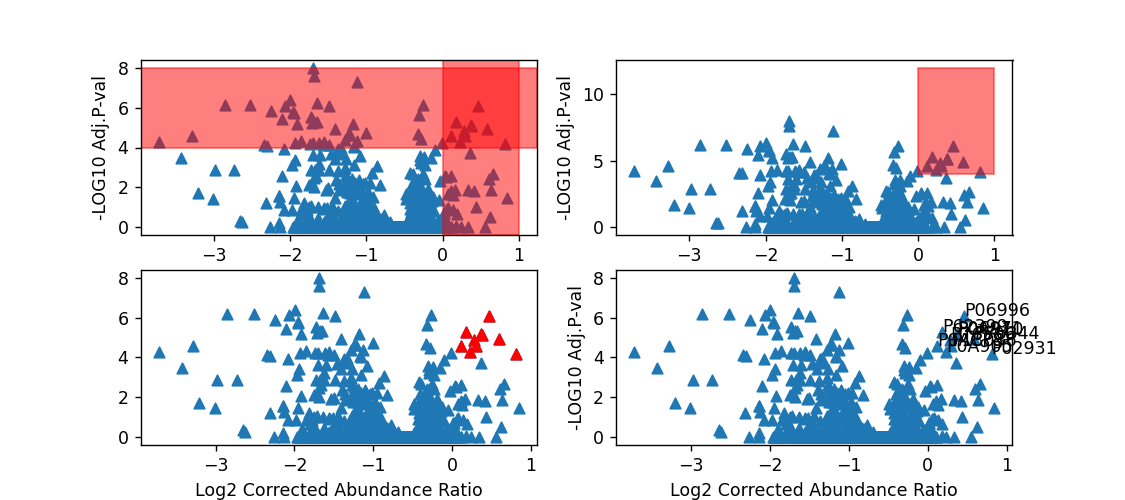

In [137]:
fig2, ax2 = plt.subplots(figsize=(9, 4), ncols=2, nrows=2)
ax2[0, 0].scatter(log2car, log10apval, marker = "^")
ax2[0, 0].set_xlabel("Log2 Corrected Abundance Ratio")
ax2[0, 0].set_ylabel("-LOG10 Adj.P-val")
ax2[0, 0].axvspan(0, 1, color='red', alpha=0.5)
ax2[0, 0].axhspan(4, 8, color='red', alpha=0.5)

import matplotlib.patches as mpatches
ax2[0, 1].scatter(log2car, log10apval, marker = "^")
ax2[0, 1].set_xlabel("Log2 Corrected Abundance Ratio")
ax2[0, 1].set_ylabel("-LOG10 Adj.P-val")
left, bottom, width, height = (0, 4, 1, 8)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=True,
                        color="red",
                        alpha=0.5,
                       linewidth=1)
ax2[0, 1].add_patch(rect)

filtered_df = df.loc[(df["Log2 Corrected Abundance Ratio"] > 0) & (df["LOG10 Adj.P-val"] > 4)]
log2car_f = filtered_df["Log2 Corrected Abundance Ratio"].tolist()              
log10apval_f = filtered_df["LOG10 Adj.P-val"].tolist()
ax2[1, 0].scatter(log2car, log10apval, marker = "^")
ax2[1, 0].scatter(log2car_f, log10apval_f, marker = "^", c="red")
ax2[1, 0].set_xlabel("Log2 Corrected Abundance Ratio")

ax2[1, 1].scatter(log2car, log10apval, marker = "^")
ax2[1, 1].set_xlabel("Log2 Corrected Abundance Ratio")
ax2[1, 1].set_ylabel("-LOG10 Adj.P-val")

for i in range(0, len(log2car_f)):
    text = list(filtered_df[filtered_df["Log2 Corrected Abundance Ratio"] == log2car_f[i]]["Accession"])[0]
    ax2[1, 1].annotate(str(text), (log2car_f[i], log10apval_f[i]))

In [144]:
filtered_df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083007,0.115042,0.000027,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133987,0.181404,0.000006,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856,0.231256,0.000051,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.213725,0.279442,0.000014,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230719,0.299501,0.000027,4.571899


<IPython.core.display.Javascript object>


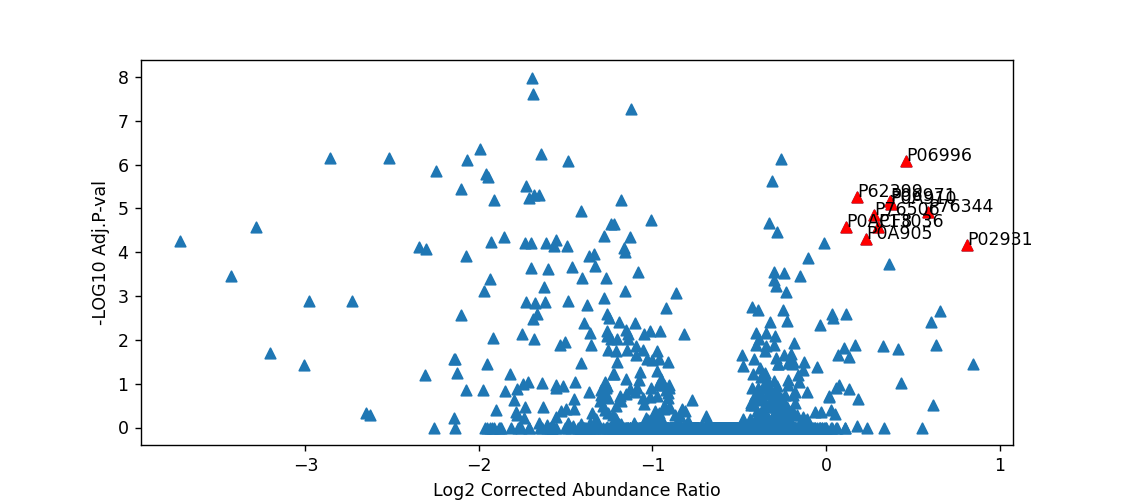

In [136]:
fig3, ax3 = plt.subplots(figsize=(9, 4))
filtered_df = df.loc[(df["Log2 Corrected Abundance Ratio"] > 0) & (df["LOG10 Adj.P-val"] > 4)]
log2car_f = filtered_df["Log2 Corrected Abundance Ratio"].tolist()              
log10apval_f = filtered_df["LOG10 Adj.P-val"].tolist()
ax3.scatter(log2car, log10apval, marker = "^")
ax3.scatter(log2car_f, log10apval_f, marker = "^", c="red")
ax3.set_xlabel("Log2 Corrected Abundance Ratio")
ax3.set_ylabel("-LOG10 Adj.P-val")

for i in range(0, len(log2car_f)):
    text = list(filtered_df[filtered_df["Log2 Corrected Abundance Ratio"] == log2car_f[i]]["Accession"])[0]
    ax3.annotate(str(text), (log2car_f[i], log10apval_f[i]))

#### Analyse ORA

##### Principes
Vous disposez d'un objet analyser permettant de réaliser une analyse de la sur-représentation (**ORA**) en termes GO parmi une liste de protéine d'intérêt.
La fréquence des termes GO dans le protéome totale est utilisée comme référence.

L'objet analyser s'instancie ainsi
```python
from stat_utils import GO_ORA_analyser
o = GO_ORA_analyser(f"{dataDir}/go.owl", proteomeDirectory, experimentalProteinDirectory)
```

Il fournit une méthode pour chaque catégorie de termes GO
<i>{ biological_process, molecular_function, cellular_component }</i>

Une éventuelle surreprésentation des termes GO de la catégorie <i>biological_process</i> est par exemple calculée parmi les protéines P29744 et P05706 de la façon suivante:

```python
goTerm_scores = o.biological_process([P29744, P05706])
```
<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous.$\downarrow$ </span>
</br><span style="color:firebrick;font-weight:bold"> $\rhd$ Inspecter l'objet retourné par la méthode o.biological_process, que voyez-vous ?</span>

In [140]:
from stat_utils import GO_ORA_analyser

proteomeDirectory = f"{dataDir}/K12_proteome"
experimentalProteinDirectory = f"{dataDir}/dataset"
o = GO_ORA_analyser(f"{dataDir}/go.owl", proteomeDirectory, experimentalProteinDirectory)

Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded


In [143]:
goTerm_scores = o.biological_process(["P29744", "P05706"])

Building biological process GO Tree
Extracting biological process ontology
Applying true path collapsing
8 GO terms, 2 leaves, 2 proteins
Extracting biological process ontology
Applying true path collapsing
2728 GO terms, 6650 leaves, 3128 proteins
Evaluated 7 / 7 Pathways, based on 2 proteins


In [145]:
goTerm_scores

[(0.03359505459608731,
  'bacterial-type flagellum-dependent cell motility',
  'GO:0071973',
  ['P29744']),
 (0.03485155369421565,
  'archaeal or bacterial-type flagellum-dependent cell motility',
  'GO:0097588',
  ['P29744']),
 (0.03673476977587685,
  'phosphoenolpyruvate-dependent sugar phosphotransferase system',
  'GO:0009401',
  ['P05706']),
 (0.037989225453758504, 'cell motility', 'GO:0048870', ['P29744']),
 (0.04312840804885229, 'localization', 'GO:0051179', ['P29744', 'P05706']),
 (1.0, 'biological_process', 'GO:0008150', ['P29744', 'P05706'])]

###### 2/ Analyser la représentation des termes GO parmi les protéines surabondantes de l'experience
<span style="color:firebrick;font-weight:bold"> $\rhd$ Vous devrez extraire les identifiants uniprot des protéines aux `Log2 Corrected Abundance Ratio` supérieurs au seuil alpha de 5%.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous conduirez sur cette liste de protéines une analyse de sur-représentatio en termes GO à l'aide d'un objet *GO_ORA_analyser*.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous pouvez faire varier le seuil d'abondance autour de la valeur alpha.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous traiterez les 3 catégories *biological_process / molecular_function /cellular_component*.</span>



Familiarisez-vous avec la structures des dictionnaires de résultas, vous pouvez [les sauvegarder au format json](https://docs.python.org/3/library/json.html).


## Une première application: représentation riche du résultat de l'analyse


### Mise en forme "riche" des résultats grâce au notebook

Jupyter permet d'étendre le concept de la méthode **__str__()** afin de produire du contenu HTML.
 Ainsi, tout objet impémentant une méthode **_repr_html_()** sera affiché, via son rendu HTML, dans la cellule d'un notebook.

```python
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Abscisse</td><td>Ordonnée</td><td>Cote</td></tr></thead>"
        htmlString += f"<tbody><tr><td>{self.x}</td><td>{self.y}</td><td>{self.z}</td></tr></tbody></table>"
        return htmlString
Point(2,3,4)
```
Affichera

![caption](../figs/reprhtml.png)


### Intégration des résultats à la visualisation du notebook 

En vous inspirant de la fonction ci-dessus, implémenter une classe Rich_GO_ORA dont la méthode [`_repr_html_`](https://ipython.readthedocs.io/en/stable/config/integrating.html) permettra un affichage plus lisible d'une des analyses `biological_process / molecular_function /cellular_component`

Un exemple possible est,
![caption](../figs/_repr_html_.png)

(Bonus): clicker sur le nom du terme GO envoie vers sa description.
Pour cela, afficher le nom du pathway dans une balise hyperlien pour permettre d'acceder à la page de description du terme GO. 

Les termes GO sont accessibles aux URL de la forme
`http://amigo.geneontology.org/amigo/term/GO:GO_NUMBER`.




## Une deuxième application: volcano plot améliorés
###### PANDAS
En choisissant comme seuil la valeur `alpha` du TP précédent, veuillez extraires les identifiants uniprot des protéines sur-abondantes (rappel les valeurs d'abondance sont celles de la colonne `Log2 Corrected Abundance Ratio`).

Vous devrez avoir dans des listes distinctes:
* identifiants uniprot
* `Log2 Corrected Abundance Ratio`
* `LOG10 Adj.P-val'`

###### Représentation graphiques
* Pour la catégorie de termes GO (biological_process / molecular_function /cellular_component) de votre choix
    * Générer une grille de 4 graphiques 
    * Dans chaque graphique colorez dans une couleur différentes les protéines porteuses de 4 termes de GO que vous estimez les plus pertinents 
    * Donnez le nom de la catégorie générale à la grille
    * Donnez le nom du terme GO représenté dans chaque graphique avec une couleur de titre cohérente.
    